## Problem 3

#### Load data

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

### a)

Variance explained by the first principal component: 0.9246


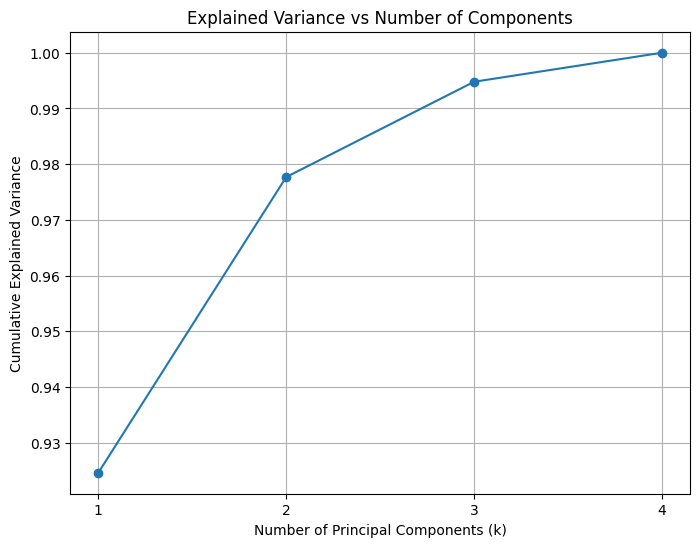

In [4]:
explained_variances = []

for k in range(1, 5):
    pca = PCA(n_components=k)
    pca.fit(X)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Print variance explained by the first component
pca_1 = PCA(n_components=1)
pca_1.fit(X)
first_pc_var = pca_1.explained_variance_ratio_[0]
print(f"Variance explained by the first principal component: {first_pc_var:.4f}")

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), explained_variances, marker='o')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.xticks([1, 2, 3, 4])
plt.show()

According to the graph and the output of the code, 92.46% of the variance in the data is explained by the first principal component

As we keep adding components to the algorithm, we continue to increase the variance that is explained by the components. For example, as we increase to 2 PCAs, about 97.7% of the variance is explained by the first two PCAs. Then 99.5% is explained by the first three PCAs. And finally 100% of the variance is explained by four PCAs, this is because we are using all of the features in the dataset. 

### b)

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

methods = {
    "a) Centering": lambda X: X - X.mean(axis=0),
    "b) Scaling": lambda X: MinMaxScaler().fit_transform(X),
    "c) Standardization": lambda X: StandardScaler().fit_transform(X),
    "d) Normalization": lambda X: Normalizer().fit_transform(X)
}

X_raw = iris.data

for label, transform in methods.items():
    X_proc = transform(X_raw)
    explained = []
    for k in range(1, 5):
        pca = PCA(n_components=k)
        pca.fit(X_proc)
        explained.append(np.sum(pca.explained_variance_ratio_))
    
    print(f"\n{label}")
    for i, var in enumerate(explained, start=1):
        print(f"  Components: {i}, Explained Variance: {var:.4f}")


a) Centering
  Components: 1, Explained Variance: 0.9246
  Components: 2, Explained Variance: 0.9777
  Components: 3, Explained Variance: 0.9948
  Components: 4, Explained Variance: 1.0000

b) Scaling
  Components: 1, Explained Variance: 0.8414
  Components: 2, Explained Variance: 0.9589
  Components: 3, Explained Variance: 0.9936
  Components: 4, Explained Variance: 1.0000

c) Standardization
  Components: 1, Explained Variance: 0.7296
  Components: 2, Explained Variance: 0.9581
  Components: 3, Explained Variance: 0.9948
  Components: 4, Explained Variance: 1.0000

d) Normalization
  Components: 1, Explained Variance: 0.9624
  Components: 2, Explained Variance: 0.9900
  Components: 3, Explained Variance: 0.9981
  Components: 4, Explained Variance: 1.0000


According to the operations done in problem 2, we have an output that shows all of the variances for each component. When centering the data, we get exactly the same variances as when the data was uncentered. Scaling results in a lower variance for all of the components compared to centering or just the raw data. With standardization, PC1 explains even less variance (only ~73%) compared to other methods; this is because standardization equalizes feature variances, which can suppress dominant features — leading to a more balanced variance distribution. With Normalization, PC1 explains the most variance as compared to the other methods. This is because normalization makes all PCs have a unit norm, meaning that most variance should be concentrated in a single direction.

### c)

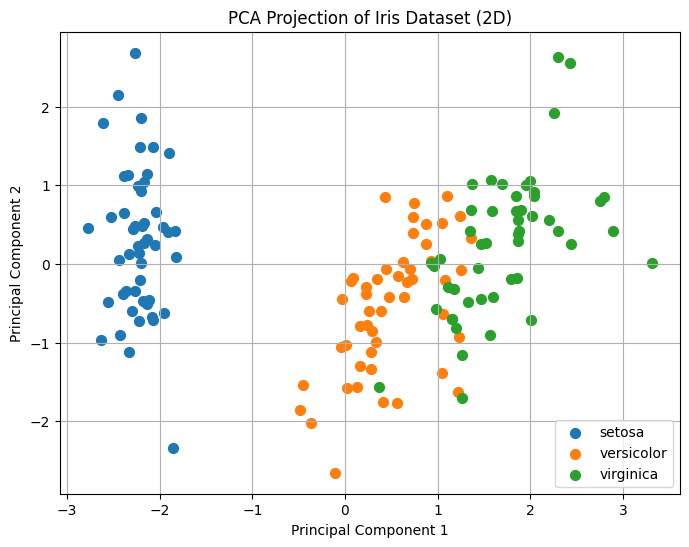

In [9]:
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y
df_pca['target_name'] = df_pca['target'].apply(lambda i: iris.target_names[i])

plt.figure(figsize=(8, 6))
for name, group in df_pca.groupby('target_name'):
    plt.scatter(group['PC1'], group['PC2'], label=name, s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Iris Dataset (2D)')
plt.legend()
plt.grid(True)
plt.show()

Here, the different classes show some distinct seperation. We see that setosa forms a distinct group on the left of the plot, while versicolor and virginica are slightly seperable on the right side of the plot with just a little bit of overlap.

### d)

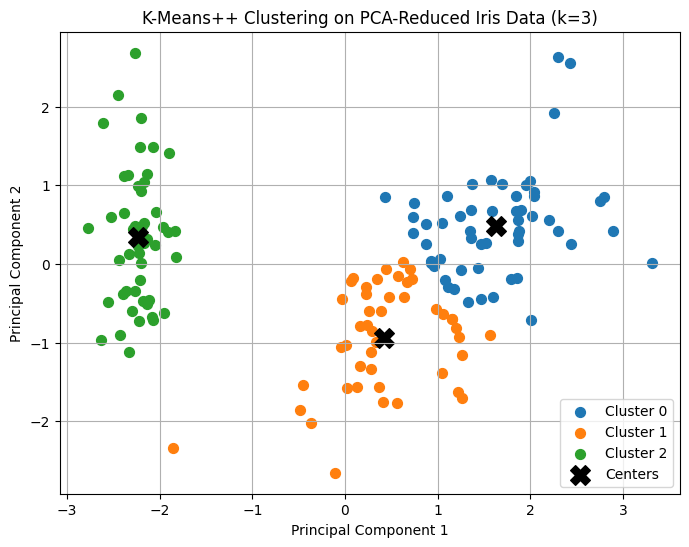

In [10]:
from sklearn.cluster import KMeans

# Cluster the 2D PCA data
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=448)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the DataFrame
df_pca['cluster'] = clusters

# Plot clusters
plt.figure(figsize=(8, 6))
for c in range(3):
    cluster_points = df_pca[df_pca['cluster'] == c]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], label=f'Cluster {c}', s=50)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Centers')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means++ Clustering on PCA-Reduced Iris Data (k=3)')
plt.legend()
plt.grid(True)
plt.show()

Here we see that the clusters found by using k++ means are slightly different than the groups found just by using the first 2 PCs. The cluster for setosa is correct, but it is the other two classes where the algorithm is slightly different.